### Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
### Draw the inferences from the clusters obtained.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score,mean_squared_error

In [2]:
df=pd.read_csv('EastWestAirlines.csv')

In [3]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
std=StandardScaler()

In [6]:
features=pd.DataFrame(std.fit_transform(df),columns=df.columns)

In [7]:
features

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-1.735125,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-1.734263,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-1.733402,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-1.732540,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,-1.731679,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,1.725097,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,1.725958,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,1.726820,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,1.727682,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


#### K Mean Clustering

In [8]:
kmean=KMeans(n_clusters=3)

In [9]:
kmean.fit(features)

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [10]:
kmean.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [11]:
kmean.cluster_centers_

array([[-0.22547568,  1.14826697,  0.83324966,  0.08964024,  0.14957307,
        -0.06276658,  0.60608195,  1.61559764,  3.5430272 ,  3.81466428,
         0.26077939,  0.91247937],
       [ 0.26436567, -0.30937281, -0.06718604, -0.59021156,  0.03268783,
        -0.06276658, -0.50680205, -0.47820736, -0.18946407, -0.20376113,
        -0.27067274, -0.34049833],
       [-0.48706844,  0.45841869,  0.02589514,  1.13960407, -0.08261048,
         0.13031308,  0.91180444,  0.7286905 , -0.07751157, -0.08390037,
         0.49491353,  0.54885896]])

In [12]:
kmean.inertia_

34529.220741588055

In [13]:
features['Cluster']=kmean.labels_

In [14]:
features

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,-1.735125,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,1
1,-1.734263,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,1
2,-1.733402,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,1
3,-1.732540,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,1
4,-1.731679,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,1.725097,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918,1
3995,1.725958,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918,1
3996,1.726820,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918,1
3997,1.727682,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919,1


In [15]:
w=[]
for i in range(1,11):
    kmean=KMeans(n_clusters=i)
    kmean.fit(features)
    w.append(kmean.inertia_)

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [16]:
w

[49130.1580395099,
 39611.08199518216,
 34529.19927561614,
 30778.84814838799,
 27096.160873328834,
 23698.075012929883,
 21160.23952672261,
 19728.77084725815,
 18375.62951034568,
 17224.246112821365]

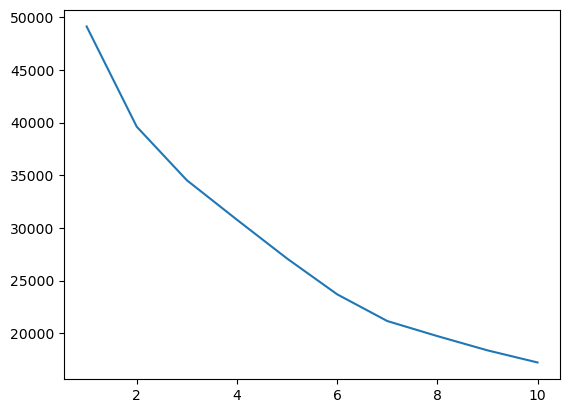

In [17]:
plt.plot(range(1,11),w)

In [18]:
silhouette_score(features,kmean.labels_)

0.2748993527621424

#### Hierarchical Clustering

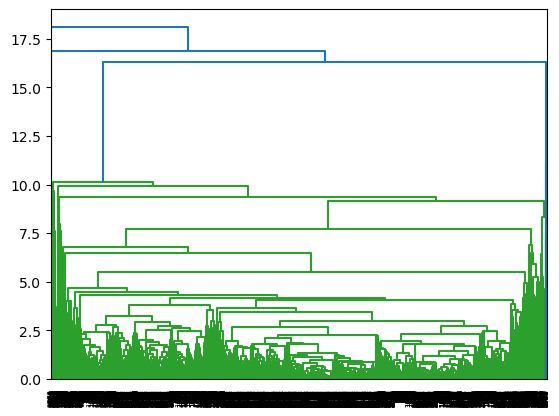

In [19]:
dendrogram=sch.dendrogram(sch.linkage(features,method='average'))

In [20]:
Hier_clust=AgglomerativeClustering(n_clusters=3)

In [21]:
Hier_clust.fit(features)

AgglomerativeClustering(n_clusters=3)

In [22]:
Hier_clust.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
silhouette_score(features,Hier_clust.labels_)

0.24044423340369203

#### DBSCAN Clustering

In [24]:
db_clust=DBSCAN(eps=0.2,min_samples=4)

In [25]:
db_clust.fit(features)

DBSCAN(eps=0.2, min_samples=4)

In [26]:
db_clust.labels_

array([ 0,  0, -1, ..., -1, -1, 22], dtype=int64)

In [27]:
silhouette_score(features,db_clust.labels_)

-0.47973819492655356

# 

### Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.


In [28]:
df=pd.read_csv('crime_data.csv')

In [29]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [30]:
features=df.drop(['Unnamed: 0'],axis=1)

In [31]:
features=pd.DataFrame(std.fit_transform(features),columns=features.columns)

In [32]:
features

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


#### Kmean

In [33]:
kmean=KMeans(n_clusters=3)

In [34]:
kmean.fit(features)

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [35]:
kmean.labels_

array([1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 0, 2, 1, 2, 1, 0, 1,
       2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0,
       2, 0, 0, 2, 2, 0])

In [36]:
silhouette_score(features,kmean.labels_)

0.30813622648945616

In [37]:
w=[]
for i in range(1,11):
    kmean=KMeans(n_clusters=i).fit(features)
    w.append(kmean.inertia_)

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks

In [38]:
w

[200.00000000000003,
 104.96163315756871,
 80.08569526137276,
 57.55425863091105,
 50.071170568930896,
 43.87027877365186,
 40.1850820501698,
 36.636853530758174,
 32.4161326776172,
 27.96536662160805]

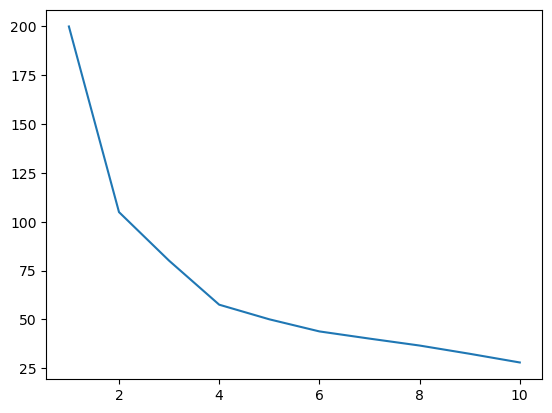

In [39]:
plt.plot(range(1,11),w)

#### Hierarchical Clustering

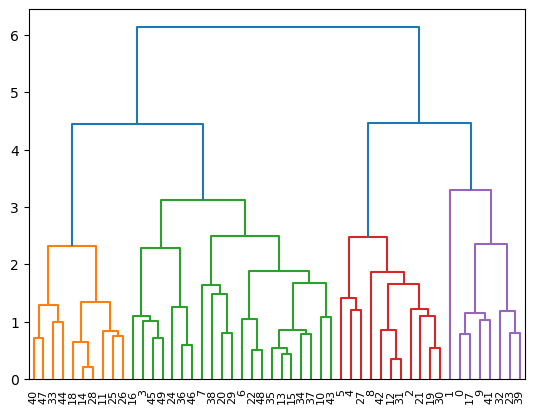

In [40]:
dendrogram=sch.dendrogram(sch.linkage(features,method='complete'))

In [41]:
Hier_clust=AgglomerativeClustering(n_clusters=2)

In [42]:
Hier_clust.fit(features)

AgglomerativeClustering()

In [43]:
Hier_clust.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [44]:
silhouette_score(features,Hier_clust.labels_)

0.4047944502519567

#### DBSCAN

In [45]:
dbscan=DBSCAN(eps=1.5,min_samples=10)

In [46]:
dbscan.fit(features)

DBSCAN(eps=1.5, min_samples=10)

In [47]:
dbscan.labels_

array([-1, -1,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)